Cat and Dog Problems

Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('/content/drive/MyDrive/DL/CNN/cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered.zip')

In [ ]:
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs.zip')
New_PATH="/content/drive/MyDrive/DL/CNN/cats_and_dogs"
!unzip $PATH -d $New_PATH

Archive:  /content/drive/MyDrive/DL/CNN/cats_and_dogs.zip
replace /content/drive/MyDrive/DL/CNN/cats_and_dogs/cats_and_dogs_filtered/vectorize.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: /content/drive/MyDrive/DL/CNN/cats_and_dogs/cats_and_dogs_filtered/vectorize.py  
replace /content/drive/MyDrive/DL/CNN/cats_and_dogs/cats_and_dogs_filtered/validation/dogs/dog.2127.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: /content/drive/MyDrive/DL/CNN/cats_and_dogs/cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
replace /content/drive/MyDrive/DL/CNN/cats_and_dogs/cats_and_dogs_filtered/validation/dogs/dog.2126.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: /content/drive/MyDrive/DL/CNN/cats_and_dogs/cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
replace /content/drive/MyDrive/DL/CNN/cats_and_dogs/cats_and_dogs_filtered/validation/dogs/dog.2125.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: /content/drive/MyDrive/DL/CNN/cats_and_d

In [2]:
dataPath='/content/drive/MyDrive/DL/CNN/cats_and_dogs/cats_and_dogs_filtered'

In [ ]:
! ls $dataPath

train  validation  vectorize.py


In [3]:
train_dir = os.path.join(dataPath,'train') 
validation_dir = os.path.join(dataPath,'validation') 

In [4]:
train_cats_dir = os.path.join(train_dir,'cats') # Directory with our training cat pics 
train_dogs_dir = os.path.join(train_dir,'dogs') # Directory with our training dogs pics 
validation_cats_dir = os.path.join(validation_dir,'cats') # Directory with our validation cats pics
validation_dogs_dir = os.path.join(validation_dir,'dogs') # Directory with our validation dogs pics 

In [5]:
num_cat_tr = len(os.listdir(train_cats_dir)) 
num_dog_tr = len(os.listdir(train_dogs_dir)) 
num_cat_val = len(os.listdir(validation_cats_dir)) 
num_dog_val = len(os.listdir(validation_dogs_dir)) 
total_train = num_cat_tr + num_dog_tr 
total_val = num_cat_val + num_dog_val 

In [6]:
print('total training cat images:', num_cat_tr) 
print('total training dog images:', num_dog_tr) 
print('total validation cat images:', num_cat_val) 
print('total validation dog images:', num_dog_val) 

print("--"*25) 
print("Total training images:", total_train) 
print("Total validation images:", total_val) 

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--------------------------------------------------
Total training images: 2000
Total validation images: 1000


In [ ]:
batch_size= 128 # power of 2 --> 64, 128, 256, 512 
epochs=10 
IMG_HEIGHT = 150 
IMG_WIDTH = 150 

In [ ]:
train_dir

'/content/drive/MyDrive/DL/CNN/cats_and_dogs/cats_and_dogs_filtered/train'

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255) # generator for our training data 
validation_image_generator = ImageDataGenerator(rescale=1./255) # generator for our validation data 

In [ ]:
train_data_gen= train_image_generator.flow_from_directory( batch_size=batch_size,
                                                          directory = train_dir,
                                                          
                                                          target_size=(IMG_HEIGHT,IMG_WIDTH), 
                                                          class_mode='binary') # Multiclass ---> class_mode ="caterogrical" 

Found 2000 images belonging to 2 classes.


In [ ]:
validation_data_gen= validation_image_generator.flow_from_directory( batch_size=batch_size,
                                                          directory = validation_dir,
                                                          
                                                          target_size=(IMG_HEIGHT,IMG_WIDTH), 
                                                          class_mode='binary') # Multiclass ---> class_mode ="caterogrical" 


Found 1000 images belonging to 2 classes.


In [ ]:
sample_training_images,check = next(train_data_gen) 

In [ ]:
len(sample_training_images)

128

In [ ]:
check

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 1., 0.], dtype=float32)

In [ ]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column. 
def plotImages(images_arr): 
  fig, axes = plt.subplots(1, 5, figsize=(20,20)) 
  axes = axes.flatten() 
  for img, ax in zip( images_arr, axes): 
    ax.imshow(img) 
    ax.axis('off') 
  plt.tight_layout() 
  plt.show() 

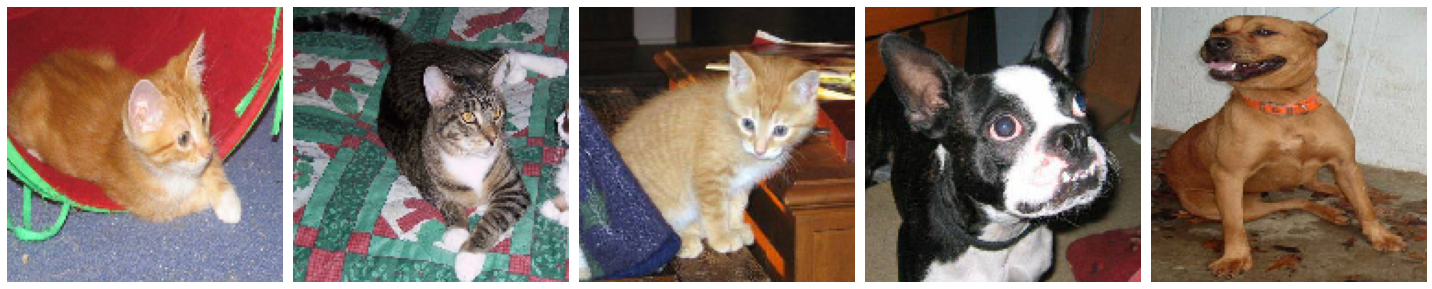

In [ ]:
plotImages(sample_training_images[3:8]) 

CNN Traning

In [ ]:
model = Sequential([
     Conv2D(16,3,padding='same',activation='relu',input_shape=(IMG_HEIGHT,IMG_WIDTH,3))
     , MaxPooling2D(), 
     Conv2D(32,3,padding='same',activation='relu'), 
     MaxPooling2D(), 
     Conv2D(64,3,padding='same',activation='relu'), 
     MaxPooling2D(), 
     Flatten(), Dense(512,activation='relu'), 
     Dense(1) ]) 

In [ ]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), 
              metrics=['accuracy']) 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

Fitting the Model

In [ ]:
# Model fit 
history = model.fit( train_data_gen, steps_per_epoch=total_train//batch_size,
                    epochs=10, validation_data=validation_data_gen,
                    validation_steps=total_val//batch_size ) 

Epoch 1/10
15/15 [==============================] - 275s 19s/step - loss: 0.6901 - accuracy: 0.5037 - val_loss: 0.6989 - val_accuracy: 0.5011
Epoch 2/10
15/15 [==============================] - 11s 780ms/step - loss: 0.6696 - accuracy: 0.5497 - val_loss: 0.6427 - val_accuracy: 0.6429
Epoch 3/10
15/15 [==============================] - 12s 782ms/step - loss: 0.6081 - accuracy: 0.6389 - val_loss: 0.6294 - val_accuracy: 0.6060
Epoch 4/10
15/15 [==============================] - 12s 823ms/step - loss: 0.5506 - accuracy: 0.6880 - val_loss: 0.5629 - val_accuracy: 0.7065
Epoch 5/10
15/15 [==============================] - 11s 771ms/step - loss: 0.4950 - accuracy: 0.7484 - val_loss: 0.5713 - val_accuracy: 0.6842
Epoch 6/10
15/15 [==============================] - 11s 772ms/step - loss: 0.4562 - accuracy: 0.7623 - val_loss: 0.5726 - val_accuracy: 0.7165
Epoch 7/10
15/15 [==============================] - 11s 771ms/step - loss: 0.3882 - accuracy: 0.8136 - val_loss: 0.5707 - val_accuracy: 0.7165


Plot the Summary

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

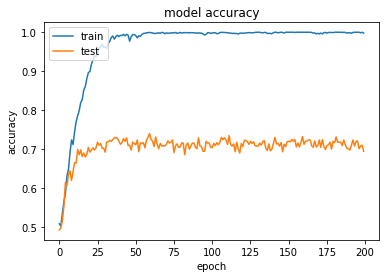

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

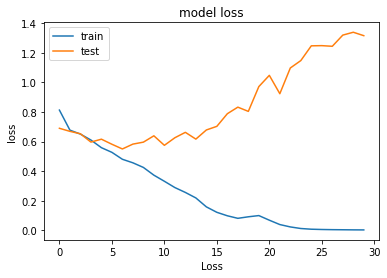

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Predicting Our Model

In [ ]:
import math 
def sigmoid(x): 
  return 1/ (1+ math.exp(-x))
img_size=(150,150) 
from PIL import Image 
import numpy as np 
im = Image.open("/content/drive/MyDrive/DL/CNN/test/dog.jpeg") 
im = im.resize(img_size) 
im = np.expand_dims(im,axis=0) 
im = np.array(im) 
im = im/255 
pred = model.predict([im]) 
pred =sigmoid(pred[0][0])
if pred >=0.5: 
  prediction='dog' 
  print("Dog") 
else: 
  prediction='cat' 
  print("cat") 


Dog


Saving Model

In [ ]:

model.save("/content/drive/MyDrive/DL/CNN/catvsdog_clf.h5")

Data Augmentation

In [ ]:
#horizontal Flip

In [ ]:
train_images_horizontal = ImageDataGenerator(rescale=1./255,horizontal_flip=True) 
train_images_horizontal_gen= train_images_horizontal.flow_from_directory( batch_size=batch_size,
                                                                         directory = train_dir, shuffle = True, 
                                                                         target_size=(IMG_HEIGHT,IMG_WIDTH), 
                                                                         class_mode='binary') # Multiclass ---> class_mode ="categorical" 

Found 2000 images belonging to 2 classes.


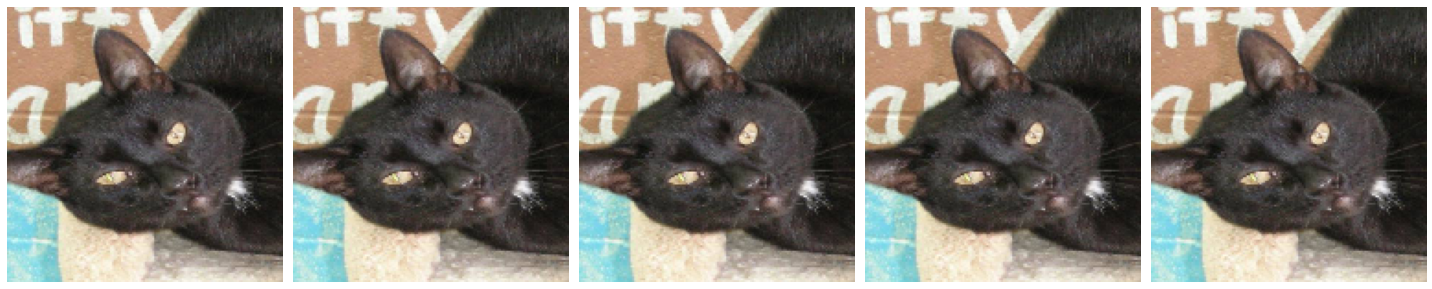

In [ ]:

augmented_images = [train_images_horizontal_gen[0][0][0] for i in range(5)] 
plotImages(augmented_images) 

In [ ]:
#Rotational Flip

In [ ]:
train_images_rotation = ImageDataGenerator(rescale=1./255,rotation_range=90) 
train_images_rotation_gen= train_images_rotation.flow_from_directory( batch_size=batch_size,
                                                                         directory = train_dir, shuffle = True, 
                                                                         target_size=(IMG_HEIGHT,IMG_WIDTH), 
                                                                         class_mode='binary') # Multiclass ---> class_mode ="categorical" 

Found 2000 images belonging to 2 classes.


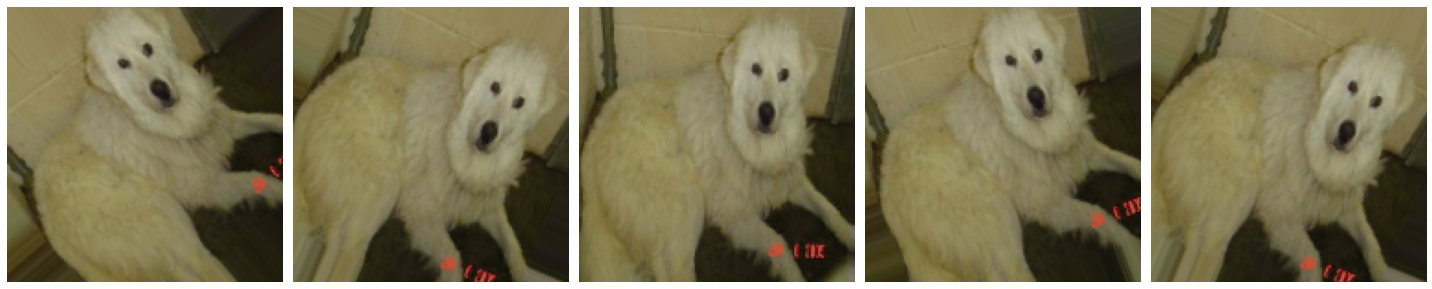

In [ ]:
augmented_images = [train_images_rotation_gen[0][0][0] for i in range(5)] 
plotImages(augmented_images) 

In [ ]:
# Zoom Flip

In [ ]:
train_images_zoom = ImageDataGenerator(rescale=1./255,zoom_range=0.5) 
train_images_zoom_gen= train_images_zoom.flow_from_directory( batch_size=batch_size,
                                                                         directory = train_dir, shuffle = True, 
                                                                         target_size=(IMG_HEIGHT,IMG_WIDTH), 
                                                                         class_mode='binary') # Multiclass ---> class_mode ="categorical" 

Found 2000 images belonging to 2 classes.


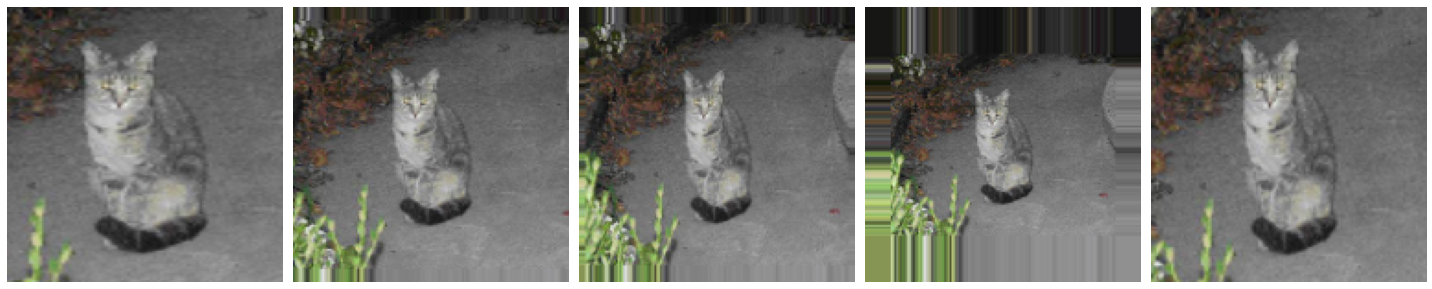

In [ ]:
augmented_images = [train_images_zoom_gen[0][0][0] for i in range(5)] 
plotImages(augmented_images) 

In [ ]:
#Height Width shift

In [ ]:
train_images_shift = ImageDataGenerator(rescale=1./255,width_shift_range=0.15,height_shift_range=0.15) 
train_images_shift_gen= train_images_shift.flow_from_directory( batch_size=batch_size,
                                                                         directory = train_dir, shuffle = True, 
                                                                         target_size=((IMG_HEIGHT,IMG_WIDTH)), 
                                                                         class_mode='binary') # Multiclass ---> class_mode ="categorical" 

Found 2000 images belonging to 2 classes.


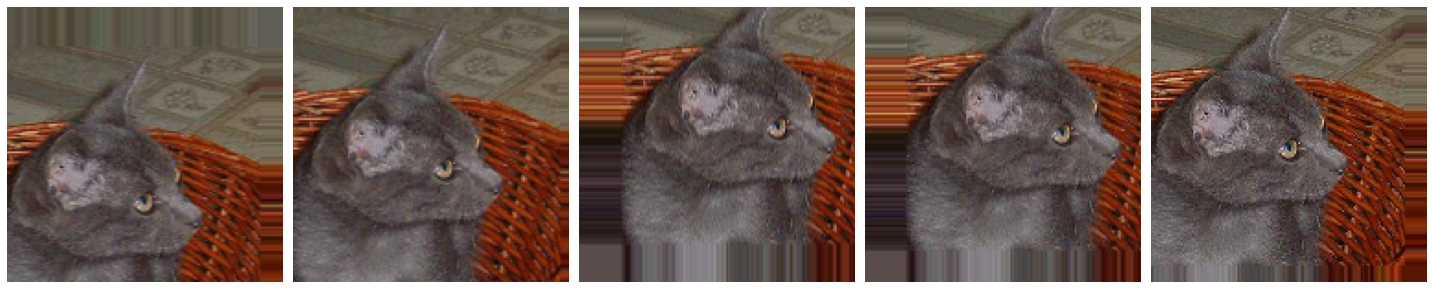

In [ ]:
augmented_images = [train_images_shift_gen[0][0][0] for i in range(5)] 
plotImages(augmented_images) 

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255,
                                           rotation_range=45,
                                           horizontal_flip=True,
                                           zoom_range=0.5,
                                           width_shift_range=.15,
                                           height_shift_range=0.15) # generator for our training data

In [ ]:
train_data_gen= train_image_generator.flow_from_directory( batch_size=batch_size,
                                          directory = train_dir,
                                          shuffle = True,
                                          target_size=(IMG_HEIGHT,IMG_WIDTH),
                                          class_mode='binary') # Multiclass ---> class_mode ="categorical"

Found 2000 images belonging to 2 classes.


In [ ]:
model_new = Sequential([
        Conv2D(16,3,padding='same',activation='relu',input_shape=(IMG_HEIGHT,IMG_WIDTH,3)),
        MaxPooling2D(),
        Dropout(0.2),
        Conv2D(32,3,padding='same',activation='relu'),
        MaxPooling2D(),
        Conv2D(64,3,padding='same',activation='relu'),
        MaxPooling2D(),
        Dropout(0.2),
        Flatten(),
        Dense(512,activation='relu'),
        Dense(1,activation='sigmoid')
])

In [ ]:
model_new.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])


In [ ]:
model_new.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 75, 75, 16)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 37, 37, 64)       

In [ ]:
history = model_new.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=200,
    validation_data=validation_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


15/15 [==============================] - 496s 33s/step - loss: 1.6542 - accuracy: 0.4936 - val_loss: 0.6933 - val_accuracy: 0.5056
Epoch 2/200
15/15 [==============================] - 20s 1s/step - loss: 0.6939 - accuracy: 0.5118 - val_loss: 0.6917 - val_accuracy: 0.5089
Epoch 3/200
15/15 [==============================] - 20s 1s/step - loss: 0.6920 - accuracy: 0.5385 - val_loss: 0.6906 - val_accuracy: 0.5826
Epoch 4/200
15/15 [==============================] - 20s 1s/step - loss: 0.6925 - accuracy: 0.5192 - val_loss: 0.6909 - val_accuracy: 0.5078
Epoch 5/200
15/15 [==============================] - 20s 1s/step - loss: 0.6893 - accuracy: 0.5646 - val_loss: 0.6867 - val_accuracy: 0.5547
Epoch 6/200
15/15 [==============================] - 21s 1s/step - loss: 0.6877 - accuracy: 0.5395 - val_loss: 0.6853 - val_accuracy: 0.5223
Epoch 7/200
15/15 [==============================] - 20s 1s/step - loss: 0.6837 - accuracy: 0.5497 - val_loss: 0.6821 - val_accuracy: 0.6038
Epoch 8/200
15/15 [====

Ploting the Outputs

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

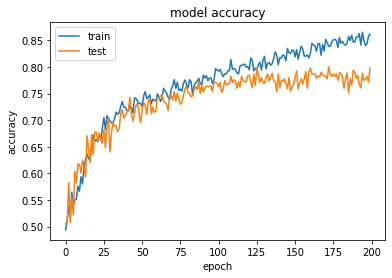

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

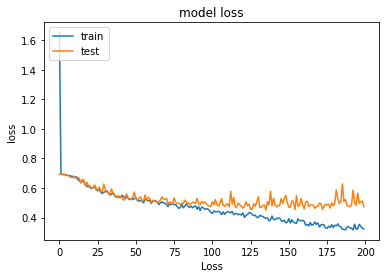

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Prediction With Agmented Model


In [ ]:
img_size=(150,150) 
from PIL import Image 
import numpy as np 
im = Image.open("/content/drive/MyDrive/DL/CNN/test/cat13.jpeg") 
im = im.resize(img_size) 
im = np.expand_dims(im,axis=0) 
im = np.array(im) 
im = im/255 
pred =model_new.predict([im]) 
if pred >=0.5: 
  prediction='dog' 
  print("Dog") 
else: 
  prediction='cat' 
  print("cat") 

Dog


Saving the Model

In [ ]:
model_new.save('/content/drive/MyDrive/DL/CNN/catvsdod_augm.h5')